In [2]:
import sys
sys.path.append('C:/Users/OU/8007/project/modules')
from json_reader import get_df
from json_reader import metadata_loader
import seaborn as sns
import re 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import pandas as pd 
import numpy as np 
import torch 
import json
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def cleaner(review:str):
   # lower casing the words and removing the puncutations 
   review = re.sub('[^a-zA-Z]+',' ', review.lower())

   # stemming and lemmatization can be considered - performance depends on the usecase and the data nature 
   # https://www.analyticsvidhya.com/blog/2022/06/stemming-vs-lemmatization-in-nlp-must-know-differences/#:~:text=Stemming-,Lemmatization,form%2C%20which%20is%20called%20Lemma.

   # removing the stop words as they contribute no value to the ratings
   stop_words = set(stopwords.words('english'))
   results = [word for word in review.strip().split() if word not in stop_words]
   return " ".join(results)

In [4]:
metadata = metadata_loader("D:/8007project/meta_Video_Games.json.gz")
metadata.head(20)

,asin,description,price,imUrl,also_bought,bought_together,buy_after_viewing,salesRank,categories
0,0078764343,Brand new sealed!,37.98,http://ecx.images-amazon.com/images/I/513h6dPb...,"[B000TI836G, B003Q53VZC, B00EFFW0HC, B003VWGBC...",[B002I098JE],"[B0050SY5BM, B000TI836G, B0037LTTRO, B002I098JE]",28655.0,"[Video Games, Xbox 360, Games]"
1,043933702X,In Stock NOW. Eligible for FREE Super Saving ...,23.50,http://ecx.images-amazon.com/images/I/61KKRndV...,None,None,"[B000067NP1, 0439573947, B00003W869, 0486406105]",44080.0,"[Video Games, PC, Games]"
2,0439339987,Grandma Groupers kelp seeds are missing and wi...,8.95,http://ecx.images-amazon.com/images/I/416QZg89...,"[B000314VVU, B000PXUOTE, B00004TJCM, B0006U22X...",None,"[B00004UCUS, B000YFIS00]",49836.0,"[Video Games, PC, Games]"
3,0439342260,This software is BRAND NEW. Packaging may diff...,NaN,http://ecx.images-amazon.com/images/I/61Wvu-Uj...,None,None,None,49156.0,"[Video Games, PC, Games]"
4,0439339960,a scholastic clubs fairs cd rom game,NaN,http://ecx.images-amazon.com/images/I/51k3oRCF...,None,None,None,52262.0,"[Video Games, PC, Games]"
5,0439374391,CD-ROM: Thomas & Friends: The Great Festival A...,20.00,http://ecx.images-amazon.com/images/I/21MTRNJY...,None,None,"[B00005Y4QA, B0013TO92W]",59834.0,"[Video Games, PC, Games]"
6,0439394422,"Product that encourages families to learn, exp...",12.96,http://ecx.images-amazon.com/images/I/51Zx2bIw...,"[B0002667BI, B00005JKTY, B0002667B8]",None,"[B00005JKTY, B00000DGSW, B0002667BI]",36531.0,"[Video Games, Mac, Games]"
7,043940133X,Your ship has crash-landed on the planet Tatoo...,30.00,http://ecx.images-amazon.com/images/I/51Gh39kq...,None,[B00004U8JO],"[B00005LBVU, 0545077850, B00002SV6E, B00004U8JO]",17910.0,"[Video Games, Mac, Games]"
8,0439573947,3 Great games in one box set!,10.79,http://ecx.images-amazon.com/images/I/514%2B24...,"[B000RLM19A, B003R79HFW, B00001NTSG, B00001NTS...",None,"[B003CF4Y7A, B000U90L32, B002ACEAR0, B00000K2Y6]",42130.0,"[Video Games, PC, Games]"
9,0439591295,cartoon network,NaN,http://ecx.images-amazon.com/images/I/51XQ-nAM...,None,None,None,12108.0,"[Video Games, PC, Games]"


In [5]:
# here i have selected images 
df = get_df('D:/8007project/reviews_Video_Games_5.json.gz')

# Checking the na of each column. If there are NAs we can use imputers from scikit learn 
print("-"*6)
print(df.isna().sum())
print("-"*6)

# Checking variable types 
df.dtypes
df.head(10)

------
reviewerID           0
asin                 0
reviewerName      2813
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64
------


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4.0,Good rally game,1372550400,"06 30, 2013"
2,A1INA0F5CWW3J4,0700099867,"Amazon Shopper ""Mr.Repsol""","[0, 0]",1st shipment received a book instead of the ga...,1.0,Wrong key,1403913600,"06 28, 2014"
3,A1DLMTOTHQ4AST,0700099867,ampgreen,"[7, 10]","I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",1315958400,"09 14, 2011"
4,A361M14PU2GUEG,0700099867,"Angry Ryan ""Ryan A. Forrest""","[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,1308009600,"06 14, 2011"
5,A2UTRVO4FDCBH6,0700099867,A.R.G.,"[0, 0]","Overall this is a well done racing game, with ...",4.0,"Good racing game, terrible Windows Live Requir...",1368230400,"05 11, 2013"
6,AN3YYDZAS3O1Y,0700099867,Bob,"[11, 13]",Loved playing Dirt 2 and I thought the graphic...,5.0,A step up from Dirt 2 and that is terrific!,1313280000,"08 14, 2011"
7,AQTC623NCESZW,0700099867,Chesty Puller,"[1, 4]",I can't tell you what a piece of dog**** this ...,1.0,Crash 3 is correct name AKA Microsoft,1353715200,"11 24, 2012"
8,A1QJJU33VNC4S7,0700099867,D@rkFX,"[0, 1]",I initially gave this one star because it was ...,4.0,A great game ruined by Microsoft's account man...,1352851200,"11 14, 2012"
9,A2JLT2WY0F2HVI,0700099867,D. Sweetapple,"[1, 1]",I still haven't figured this one out. Did ever...,2.0,Couldn't get this one to work,1391817600,"02 8, 2014"


In [6]:
merged_df = pd.merge(df, metadata, on = 'asin', how = 'inner')
merged_df.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,description,price,imUrl,also_bought,bought_together,buy_after_viewing,salesRank,categories
0,A2HD75EMZR8QLN,0700099867,123,"[8, 12]",Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,1341792000,"07 9, 2012",Dirt 3 is a popular rally racing game for Play...,246.63,http://ecx.images-amazon.com/images/I/41xSe3Sp...,"[B00488PZ0U, B008BT80SQ, B0016O5G62, B002AQNT9...","[B00488PZ0U, B001NT9TK4]","[B00488PZ0U, B001NT9TK4, B002AQNT96, B000C97156]",6629.0,"[Video Games, PC, Games]"
1,A3UR8NLLY1ZHCX,0700099867,"Alejandro Henao ""Electronic Junky""","[0, 0]",If you like rally cars get this game you will ...,4.0,Good rally game,1372550400,"06 30, 2013",Dirt 3 is a popular rally racing game for Play...,246.63,http://ecx.images-amazon.com/images/I/41xSe3Sp...,"[B00488PZ0U, B008BT80SQ, B0016O5G62, B002AQNT9...","[B00488PZ0U, B001NT9TK4]","[B00488PZ0U, B001NT9TK4, B002AQNT96, B000C97156]",6629.0,"[Video Games, PC, Games]"


In [7]:
columns_to_remove = ['reviewerID', 'reviewerName', 'reviewTime','unixReviewTime','also_bought','bought_together','imUrl','buy_after_viewing']
new_df = merged_df.drop(columns=columns_to_remove, axis=1)
new_df.head(15)

,asin,helpful,reviewText,overall,summary,description,price,salesRank,categories
0,0700099867,"[8, 12]",Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]"
1,0700099867,"[0, 0]",If you like rally cars get this game you will ...,4.0,Good rally game,Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]"
2,0700099867,"[0, 0]",1st shipment received a book instead of the ga...,1.0,Wrong key,Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]"
3,0700099867,"[7, 10]","I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]"
4,0700099867,"[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]"
5,0700099867,"[0, 0]","Overall this is a well done racing game, with ...",4.0,"Good racing game, terrible Windows Live Requir...",Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]"
6,0700099867,"[11, 13]",Loved playing Dirt 2 and I thought the graphic...,5.0,A step up from Dirt 2 and that is terrific!,Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]"
7,0700099867,"[1, 4]",I can't tell you what a piece of dog**** this ...,1.0,Crash 3 is correct name AKA Microsoft,Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]"
8,0700099867,"[0, 1]",I initially gave this one star because it was ...,4.0,A great game ruined by Microsoft's account man...,Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]"
9,0700099867,"[1, 1]",I still haven't figured this one out. Did ever...,2.0,Couldn't get this one to work,Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]"


In [8]:
new_df.info()
new_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231780 entries, 0 to 231779
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   asin         231780 non-null  object 
 1   helpful      231780 non-null  object 
 2   reviewText   231780 non-null  object 
 3   overall      231780 non-null  float64
 4   summary      231780 non-null  object 
 5   description  228632 non-null  object 
 6   price        228961 non-null  float64
 7   salesRank    223808 non-null  float64
 8   categories   231780 non-null  object 
dtypes: float64(3), object(6)
memory usage: 17.7+ MB


,overall,price,salesRank
count,231780.000000,228961.000000,223808.000000
mean,4.086397,54.384024,7288.494549
std,1.202330,74.117283,9296.413930
min,1.000000,0.000000,3.000000
25%,4.000000,19.990000,1138.000000
50%,5.000000,29.990000,3518.000000
75%,5.000000,59.990000,10116.000000
max,5.000000,999.990000,116366.000000


In [9]:
overall_counts = df['overall'].value_counts()
asin_counts = df['asin'].value_counts()
print(overall_counts,asin_counts)

5.0    120185
4.0     54804
3.0     28275
1.0     14853
2.0     13663
Name: overall, dtype: int64 B00BGA9WK2    802
B0015AARJI    652
B007CM0K86    517
B002VBWIP6    465
B0009VXBAQ    447
             ... 
B00004SVRQ      5
B000692N0K      5
B00FFL7WRS      5
B0001XALPA      5
B00001OX4T      5
Name: asin, Length: 10672, dtype: int64


In [10]:
# 找出 "price" 列中的空值
missing_price = new_df[new_df['price'].isna()]  # 或 new_df[new_df['price'].isnull()]
print(missing_price[['asin', 'price']])
asin_counts = missing_price['asin'].value_counts()
print(asin_counts)

              asin  price
954     B00000I1B7    NaN
955     B00000I1B7    NaN
956     B00000I1B7    NaN
957     B00000I1B7    NaN
958     B00000I1B7    NaN
...            ...    ...
231741  B00JXW6GE0    NaN
231742  B00JXW6GE0    NaN
231743  B00JXW6GE0    NaN
231744  B00JXW6GE0    NaN
231745  B00JXW6GE0    NaN

[2819 rows x 2 columns]
B000MKA60W    222
B00064MUIA    136
B00DJFIMW6     79
B000JHO4L0     74
B003OAE79S     69
             ... 
B00003O9KY      5
B004GEAWFY      5
B0002SLBPI      5
B00004SVS9      5
B00002ST35      5
Name: asin, Length: 195, dtype: int64


In [11]:
new_df = new_df.dropna(subset=['price'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228961 entries, 0 to 231779
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   asin         228961 non-null  object 
 1   helpful      228961 non-null  object 
 2   reviewText   228961 non-null  object 
 3   overall      228961 non-null  float64
 4   summary      228961 non-null  object 
 5   description  227237 non-null  object 
 6   price        228961 non-null  float64
 7   salesRank    222508 non-null  float64
 8   categories   228961 non-null  object 
dtypes: float64(3), object(6)
memory usage: 17.5+ MB


In [15]:
salesRank_counts = new_df['salesRank'].value_counts()
print(salesRank_counts)
new_df = new_df.dropna(subset=['salesRank','description'])
new_df.info()

13.0       1105
99.0        793
140.0       696
31.0        592
20.0        569
           ... 
9722.0        5
34843.0       5
22114.0       5
17423.0       5
3426.0        5
Name: salesRank, Length: 8549, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 221303 entries, 0 to 231779
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   asin         221303 non-null  object 
 1   helpful      221303 non-null  object 
 2   reviewText   221303 non-null  object 
 3   overall      221303 non-null  float64
 4   summary      221303 non-null  object 
 5   description  221303 non-null  object 
 6   price        221303 non-null  float64
 7   salesRank    221303 non-null  float64
 8   categories   221303 non-null  object 
dtypes: float64(3), object(6)
memory usage: 16.9+ MB


price

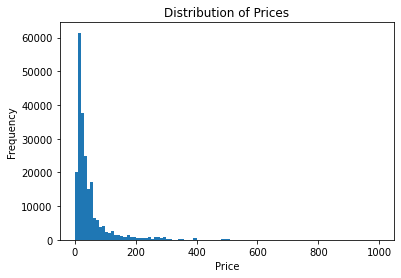

In [16]:
# 绘制 "price" 列的直方图
plt.hist(new_df['price'], bins=100)  # 100 个直方柱
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

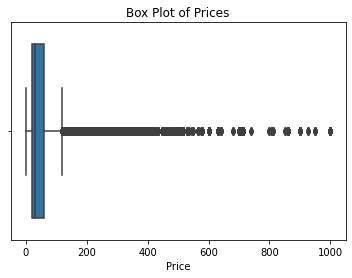

In [17]:
# 绘制 "price" 列的箱线图
sns.boxplot(x=new_df['price'])
plt.xlabel('Price')
plt.title('Box Plot of Prices')
plt.show()

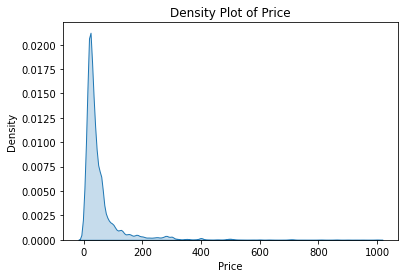

In [18]:
# 使用 Seaborn 绘制密度图
sns.kdeplot(new_df['price'], shade=True)

# 添加标签和标题
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Price')

# 显示图形
plt.show()

salesRank

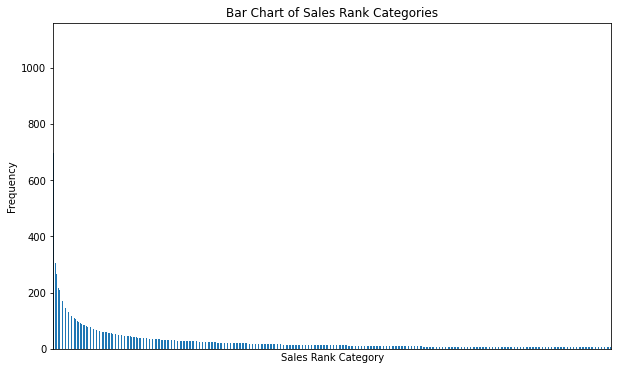

In [19]:
# 计算各类别的频数
sales_rank_counts = new_df['salesRank'].value_counts()
# 绘制条形图
plt.figure(figsize=(10, 6))
sales_rank_counts.plot(kind='bar')
plt.xlabel('Sales Rank Category')
plt.ylabel('Frequency')
plt.title('Bar Chart of Sales Rank Categories')
# 隐藏 x 轴的文字标签
plt.xticks([])
plt.show()

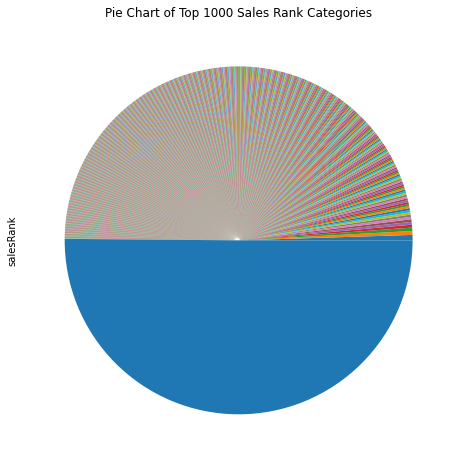

In [20]:
#pie chart 效果不是很好,太多了.....
# 选择要包括的前 N 个最重要的类别
N = 1000
top_categories = new_df['salesRank'].value_counts().head(N)

# 将剩余的类别合并为一个单独的类别 "Other"
other_categories_count = new_df['salesRank'].value_counts().iloc[N:].sum()
top_categories['Other'] = other_categories_count

# 绘制饼图，并隐藏比例文字
plt.figure(figsize=(8, 8))
top_categories.plot(kind='pie', autopct='', labels=None)  # 设置 autopct 为空字符串，labels=None 隐藏标签
plt.title(f'Pie Chart of Top {N} Sales Rank Categories')
plt.show()

D:\anaconda\envs\pytorch\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


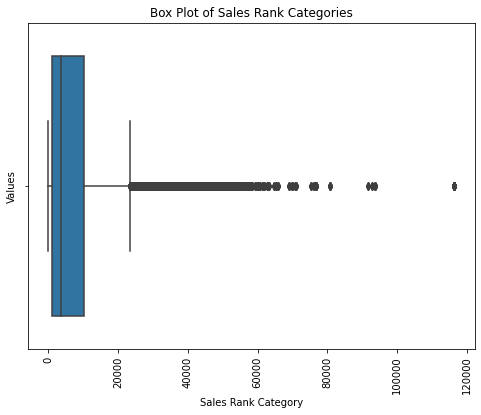

In [21]:
# 绘制box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=new_df, x='salesRank', orient='vertical')
plt.xlabel('Sales Rank Category')
plt.ylabel('Values')
plt.title('Box Plot of Sales Rank Categories')
plt.xticks(rotation=90)  # 使 x 轴标签垂直显示
plt.show()

categories

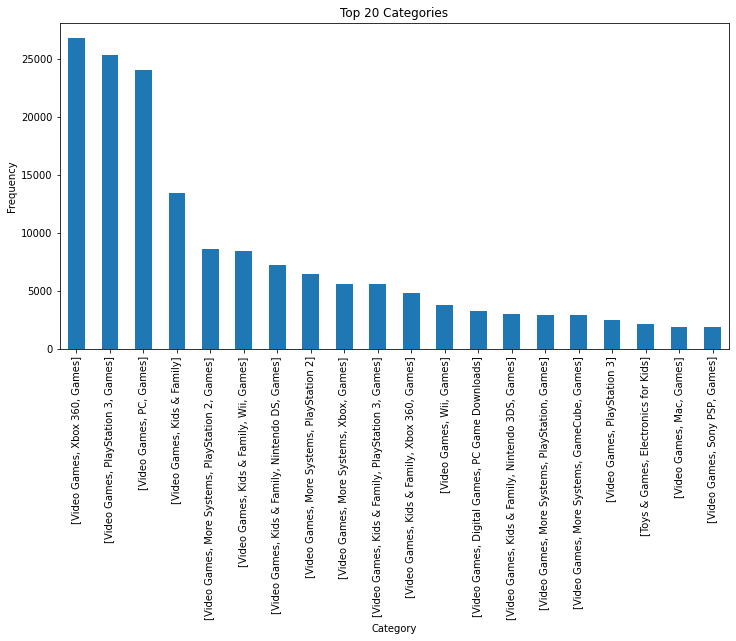

In [22]:
# 计算各类别的频数
category_counts = new_df['categories'].value_counts()
# 绘制条形图
plt.figure(figsize=(12, 6))
category_counts.head(20).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Top 20 Categories')
plt.xticks(rotation=90)  # 旋转 x 轴标签以避免重叠
plt.show()


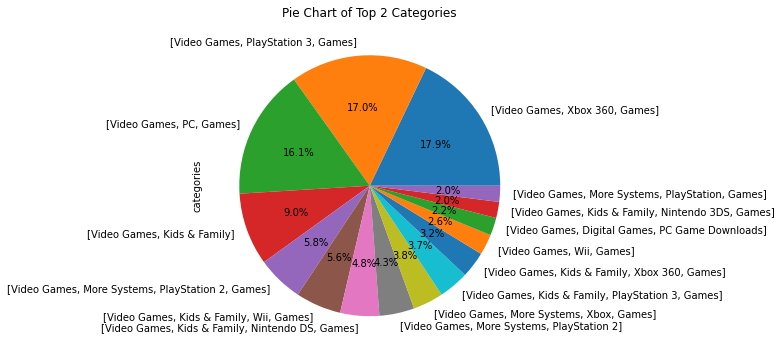

In [23]:
# 计算前15个类别的频数
top_categories = new_df['categories'].value_counts().head(15)

# 绘制饼图
plt.figure(figsize=(6, 6))
top_categories.plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Top 2 Categories')
plt.show()


helpful

In [24]:
print(new_df['helpful'])



0          [8, 12]
1           [0, 0]
2           [0, 0]
3          [7, 10]
4           [2, 2]
            ...   
231775      [0, 1]
231776     [8, 11]
231777    [62, 66]
231778    [33, 36]
231779    [23, 28]
Name: helpful, Length: 221303, dtype: object


In [25]:
# 从 new_df['helpful'] 列中提取上下限
new_df[['lowhelp', 'highhelp']] = pd.DataFrame(new_df['helpful'].tolist(), index=new_df.index)
# 计算均值列
new_df['meanhelp'] = (new_df['lowhelp'] + new_df['highhelp']) / 2

# 找出 'meanhelp' 列中数值大于 5000 的行
rows_to_drop = new_df[new_df['meanhelp'] >1500]

# 删除这些行
new_df = new_df.drop(rows_to_drop.index)

# 如果你想要重置索引，可以执行以下操作
new_df.reset_index(drop=True, inplace=True)
new_df.head(5)

,asin,helpful,reviewText,overall,summary,description,price,salesRank,categories,lowhelp,highhelp,meanhelp
0,0700099867,"[8, 12]",Installing the game was a struggle (because of...,1.0,Pay to unlock content? I don't think so.,Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]",8,12,10.0
1,0700099867,"[0, 0]",If you like rally cars get this game you will ...,4.0,Good rally game,Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]",0,0,0.0
2,0700099867,"[0, 0]",1st shipment received a book instead of the ga...,1.0,Wrong key,Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]",0,0,0.0
3,0700099867,"[7, 10]","I got this version instead of the PS3 version,...",3.0,"awesome game, if it did not crash frequently !!",Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]",7,10,8.5
4,0700099867,"[2, 2]",I had Dirt 2 on Xbox 360 and it was an okay ga...,4.0,DIRT 3,Dirt 3 is a popular rally racing game for Play...,246.63,6629.0,"[Video Games, PC, Games]",2,2,2.0


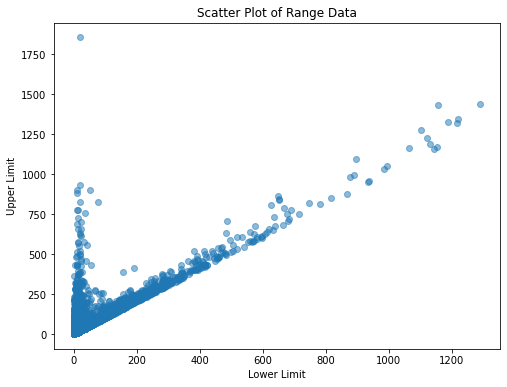

In [26]:
#helpful上下限之间的关系
# 提取范围数据的下限和上限
lower_limits = new_df['helpful'].apply(lambda x: x[0])
upper_limits = new_df['helpful'].apply(lambda x: x[1])

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(lower_limits, upper_limits, marker='o', alpha=0.5)
plt.xlabel('Lower Limit')
plt.ylabel('Upper Limit')
plt.title('Scatter Plot of Range Data')
plt.show()

In [27]:
# 计算均值、标准差、中位数等统计信息
mean = new_df['meanhelp'].mean()
std = new_df['meanhelp'].std()
median = new_df['meanhelp'].median()
min_val = new_df['meanhelp'].min()
max_val = new_df['meanhelp'].max()
print(f"均值 (Mean): {mean}")
print(f"标准差 (Standard Deviation): {std}")
print(f"中位数 (Median): {median}")
print(f"最小值 (Minimum): {min_val}")
print(f"最大值 (Maximum): {max_val}")

均值 (Mean): 5.022072446609488
标准差 (Standard Deviation): 22.07354190571701
中位数 (Median): 1.0
最小值 (Minimum): 0.0
最大值 (Maximum): 1364.5


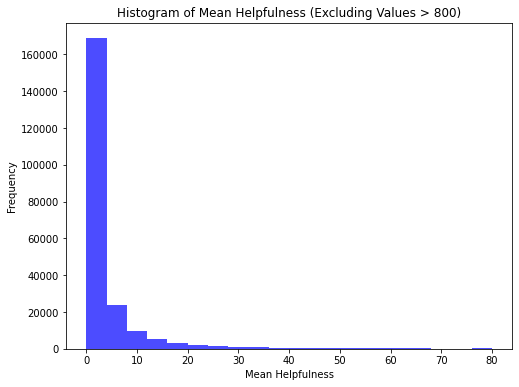

In [28]:
#直方图效果不是很好,必须加上一个范围,大部分评价的均值都在10以内
# 绘制均值的直方图
# 去除大于80的数据
filtered_meanhelp = new_df[new_df['meanhelp'] <= 80]

# 绘制均值的直方图
plt.figure(figsize=(8, 6))
plt.hist(filtered_meanhelp['meanhelp'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Mean Helpfulness')
plt.ylabel('Frequency')
plt.title('Histogram of Mean Helpfulness (Excluding Values > 800)')
plt.show()

Results using CountVectorizer


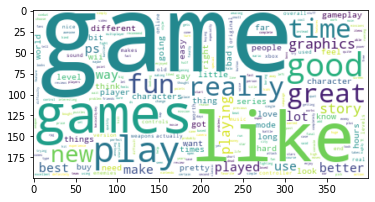

Results using TfidfVectorizer


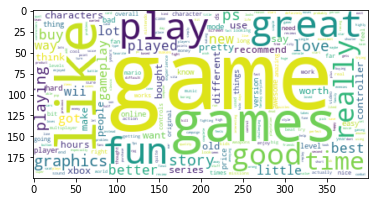

In [30]:
X=new_df['reviewText'].apply(cleaner)
fig, ax = plt.subplots()
for i in [CountVectorizer, TfidfVectorizer]:
    vectorizer = i(analyzer='word', stop_words='english')
    results = vectorizer.fit_transform(X)
    feature_names = vectorizer.get_feature_names()  # Updated: Use get_feature_names() to get feature names
    # Avoiding conversion to dense matrix, directly working with sparse matrix
    _sum = results.sum(axis=0)
    features = zip(feature_names, _sum.A1)  # A1 to access the flattened array
    _dict = dict(features)
    print(f"Results using {i.__name__}")  # Print the name of the vectorizer used
    # Analyze the results with word cloud
    w = WordCloud(background_color="white", max_words=250).generate_from_frequencies(_dict)
    # Show the plot for the current iteration
    plt.imshow(w, interpolation='bilinear')
    plt.show()
# Show all plots after the loop finishes (if needed)
plt.show()


Results using CountVectorizer


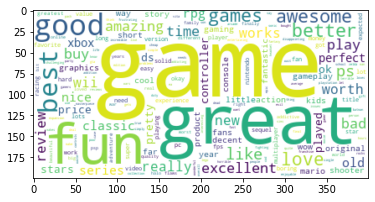

Results using TfidfVectorizer


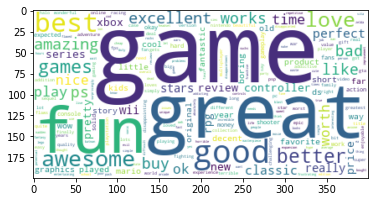

In [29]:
Y=new_df['summary'].apply(cleaner)
fig, ax = plt.subplots()

for i in [CountVectorizer, TfidfVectorizer]:
    vectorizer = i(analyzer='word', stop_words='english')
    results = vectorizer.fit_transform(Y)
    feature_names = vectorizer.get_feature_names()  # Updated: Use get_feature_names() to get feature names
    # Avoiding conversion to dense matrix, directly working with sparse matrix
    _sum = results.sum(axis=0)
    features = zip(feature_names, _sum.A1)  # A1 to access the flattened array
    _dict = dict(features)
    print(f"Results using {i.__name__}")  # Print the name of the vectorizer used
    # Analyze the results with word cloud
    w = WordCloud(background_color="white", max_words=250).generate_from_frequencies(_dict)
    # Show the plot for the current iteration
    plt.imshow(w, interpolation='bilinear')
    plt.show()
# Show all plots after the loop finishes (if needed)
plt.show()

Results using CountVectorizer


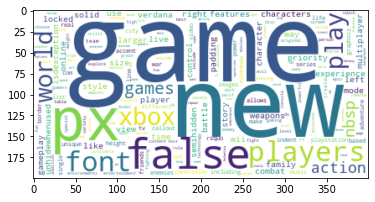

Results using TfidfVectorizer


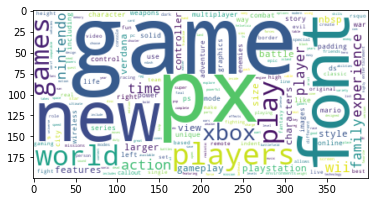

In [30]:
Z=new_df['description'].apply(cleaner)
fig, ax = plt.subplots()

for i in [CountVectorizer, TfidfVectorizer]:
    vectorizer = i(analyzer='word', stop_words='english')
    results = vectorizer.fit_transform(Z)
    feature_names = vectorizer.get_feature_names()  # Updated: Use get_feature_names() to get feature names
    # Avoiding conversion to dense matrix, directly working with sparse matrix
    _sum = results.sum(axis=0)
    features = zip(feature_names, _sum.A1)  # A1 to access the flattened array
    _dict = dict(features)
    print(f"Results using {i.__name__}")  # Print the name of the vectorizer used
    # Analyze the results with word cloud
    w = WordCloud(background_color="white", max_words=250).generate_from_frequencies(_dict)
    # Show the plot for the current iteration
    plt.imshow(w, interpolation='bilinear')
    plt.show()
# Show all plots after the loop finishes (if needed)
plt.show()

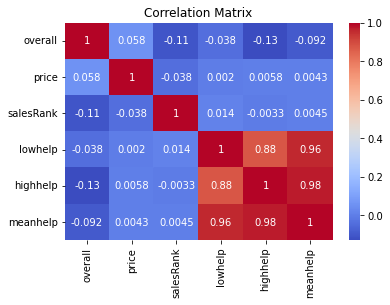

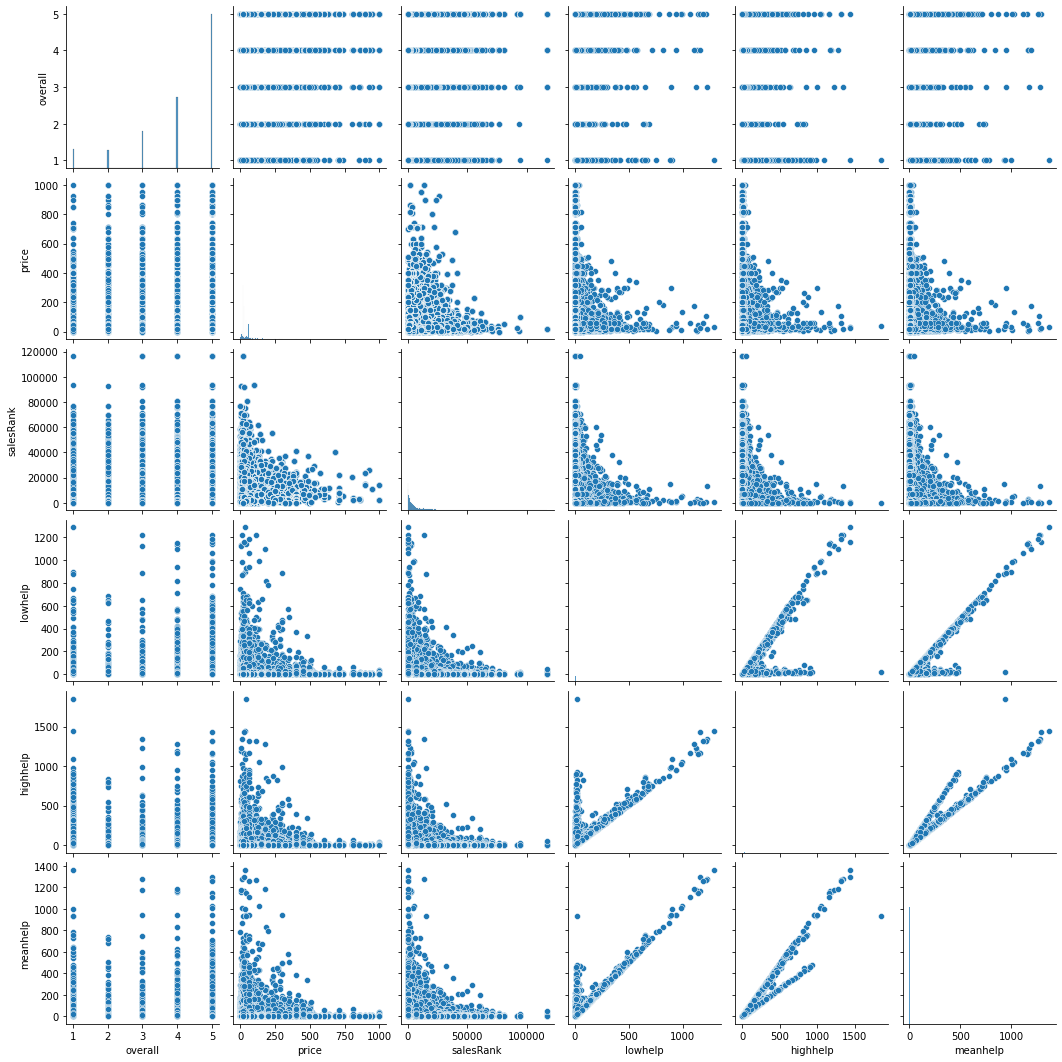

In [33]:
# 计算相关系数矩阵
correlation_matrix = new_df.corr()

# 绘制相关矩阵图
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 绘制散点图
sns.pairplot(new_df)
plt.show()
